In [2]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
torch.cuda.is_available()

True

In [4]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [5]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [6]:
agg_results_data = get_all_results(True)

In [7]:
agg_results_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   dataset             16 non-null     object 
 1   model_name          16 non-null     object 
 2   max_train_accuracy  16 non-null     float64
 3   max_test_accuracy   16 non-null     float64
 4   epochs              16 non-null     float64
 5   execution_time      16 non-null     float64
 6   time_per_epoch      16 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.0+ KB


In [8]:
agg_results_data

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
0,articularywordrecognition,FullyConvolutionalNetwork1D,0.998043,0.995652,5000.0,72.692681,0.014539
1,articularywordrecognition,MultiLayerPerceptron,0.999130,0.981739,5000.0,91.039614,0.018208
2,atrialfibrillation,FullyConvolutionalNetwork1D,1.000000,0.433333,5000.0,15.365478,0.003073
3,atrialfibrillation,MultiLayerPerceptron,1.000000,0.516667,5000.0,7.680521,0.001536
4,basicmotions,FullyConvolutionalNetwork1D,1.000000,1.000000,5000.0,0.058370,0.000012
5,basicmotions,MultiLayerPerceptron,0.987500,0.918750,5000.0,11.948030,0.002390
6,cricket,FullyConvolutionalNetwork1D,0.981944,1.000000,5000.0,0.430476,0.000086
7,cricket,MultiLayerPerceptron,0.994444,0.975000,5000.0,16.067394,0.003213
8,eigenworms,FullyConvolutionalNetwork1D,1.000000,0.930769,5000.0,1802.640794,0.360528
9,eigenworms,MultiLayerPerceptron,1.000000,0.546154,5000.0,302.334677,0.060467


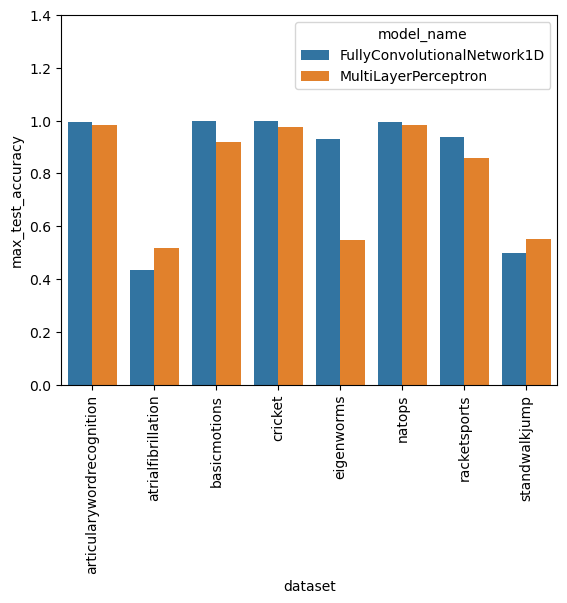

In [9]:
sns.barplot(data = agg_results_data, x = 'dataset', y = 'max_test_accuracy', hue = 'model_name')
plt.xticks(rotation = 90)
plt.ylim([0, 1.4])
plt.show()

In [60]:
class FullyConvolutionalNetwork1DLate_test(nn.Module):

    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.modalities = nn.ModuleDict()

        self.network1 = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=128, kernel_size=8),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm1d(128)
            # nn.AdaptiveAvgPool1d(output_size=1),
            # nn.Flatten()
        )

        self.network2 = nn.Sequential(
            nn.Conv1d(in_channels=3, out_channels=128, kernel_size=8),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm1d(128)
            # nn.AdaptiveAvgPool1d(output_size=1),
            # nn.Flatten()
        )


        self.pooling_layer = nn.AdaptiveAvgPool1d(output_size=1)
        # self.fusion_conv = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3)  # Adjust dimensions as needed
        self.final_fc = nn.Linear(in_features=128, out_features=6)



    def forward(self, x):

        out_network1 = self.network1(x[0])
        out_network2 = self.network2(x[1])

        

        return out_network1.shape, out_network2.shape



test_model = FullyConvolutionalNetwork1DLate_test()

torch.manual_seed(42)
simulated_multi_modal = torch.rand(size = (64, 6, 100))
modality1 = simulated_multi_modal[:, 0:3, :]
modality2 = simulated_multi_modal[:, 3:, :]
all_modalities = torch.stack([modality1, modality2])
    

In [61]:
test_model(all_modalities)

(torch.Size([64, 128, 87]), torch.Size([64, 128, 87]))